In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.signal import find_peaks

from sre_parse import CATEGORIES


all = pd.DataFrame(pd.read_excel('sensordata_excel/complete_data_up_down.xlsx'))

all.dropna()
all.shape

data = all[['acc.ax','acc.ay','acc.az','acc.gx','acc.gy','acc.gz','gyro.gx','gyro.gy','gyro.gz','timestamp']]
target = all[['target']]
target_names = all[['target.names']]
print(data)





        acc.ax    acc.ay    acc.az  acc.gx  acc.gy  acc.gz   gyro.gx  \
0    -0.037088  0.193736  1.096536    1.19   -4.41    0.35  4.313044   
1     0.029280 -0.057584  0.921344    2.31   -6.79   -4.34 -4.730435   
2     0.007320  0.103456  1.143384    1.68   -4.90   -1.75  3.547826   
3     0.034160  0.111752  0.853024    0.56   -3.57   -3.29  0.486957   
4     0.006832 -0.111264  1.054080   -1.96   -3.36   -1.61  2.295652   
...        ...       ...       ...     ...     ...     ...       ...   
1778  0.048312  0.019032  0.843752   -4.20   -4.69   -0.70  6.608696   
1779 -0.015128  0.136640  1.009184   -0.28   -5.74   -1.40  3.130435   
1780 -0.024400  0.054168  1.040416    1.96   -4.90   -1.82  1.460870   
1781 -0.048800  0.334768  0.969656    2.38   -4.97   -2.66 -6.956522   
1782  0.010248  0.030256  1.084824    2.24   -1.82   -2.80 -0.347826   

       gyro.gy   gyro.gz      timestamp  
0     2.434783 -0.208696  1662115415043  
1    -2.504348  0.834783  1662115415100  
2    -1.3

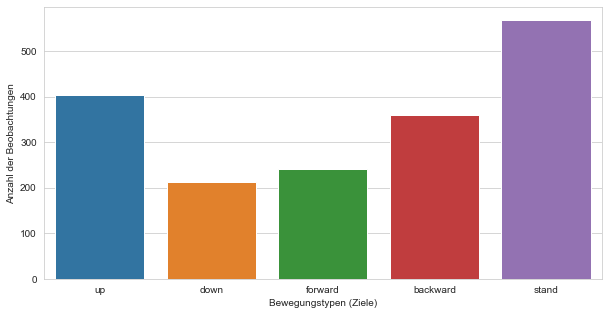

In [2]:
sns.set_style('whitegrid') 
plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'target.names', data = all) 
plt.xlabel('Bewegungstypen (Ziele)')
plt.ylabel('Anzahl der Beobachtungen')
plt.show( )

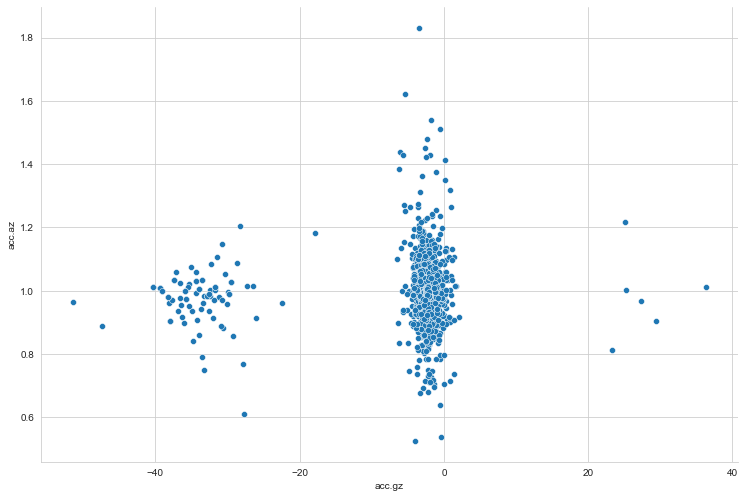

In [3]:
import seaborn as sns



sns.pairplot(all, x_vars= ['acc.gz'], y_vars='acc.az', size = 7, aspect= 1.5)

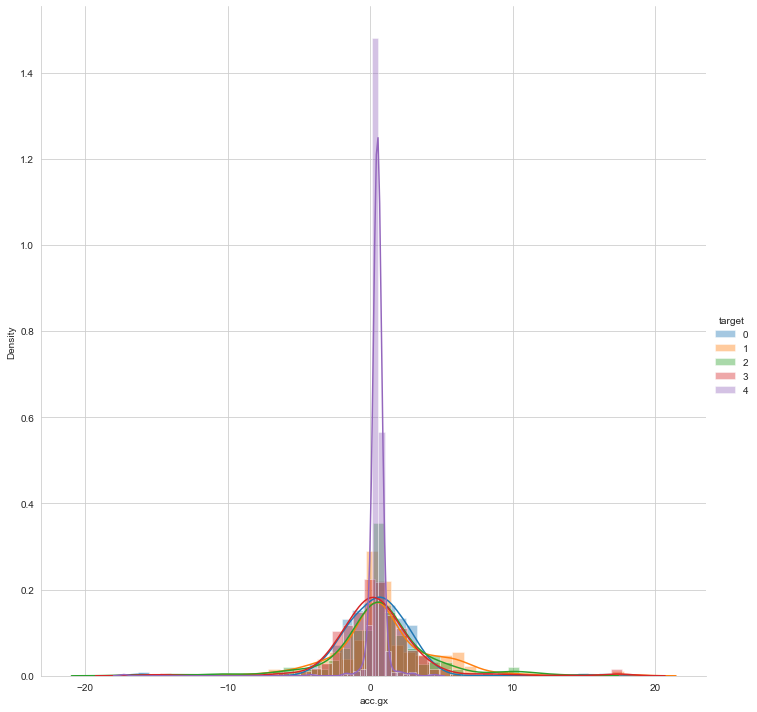

In [4]:
sns.FacetGrid(all, hue = 'target', size = 10).map(sns.distplot, 'acc.gx').add_legend()

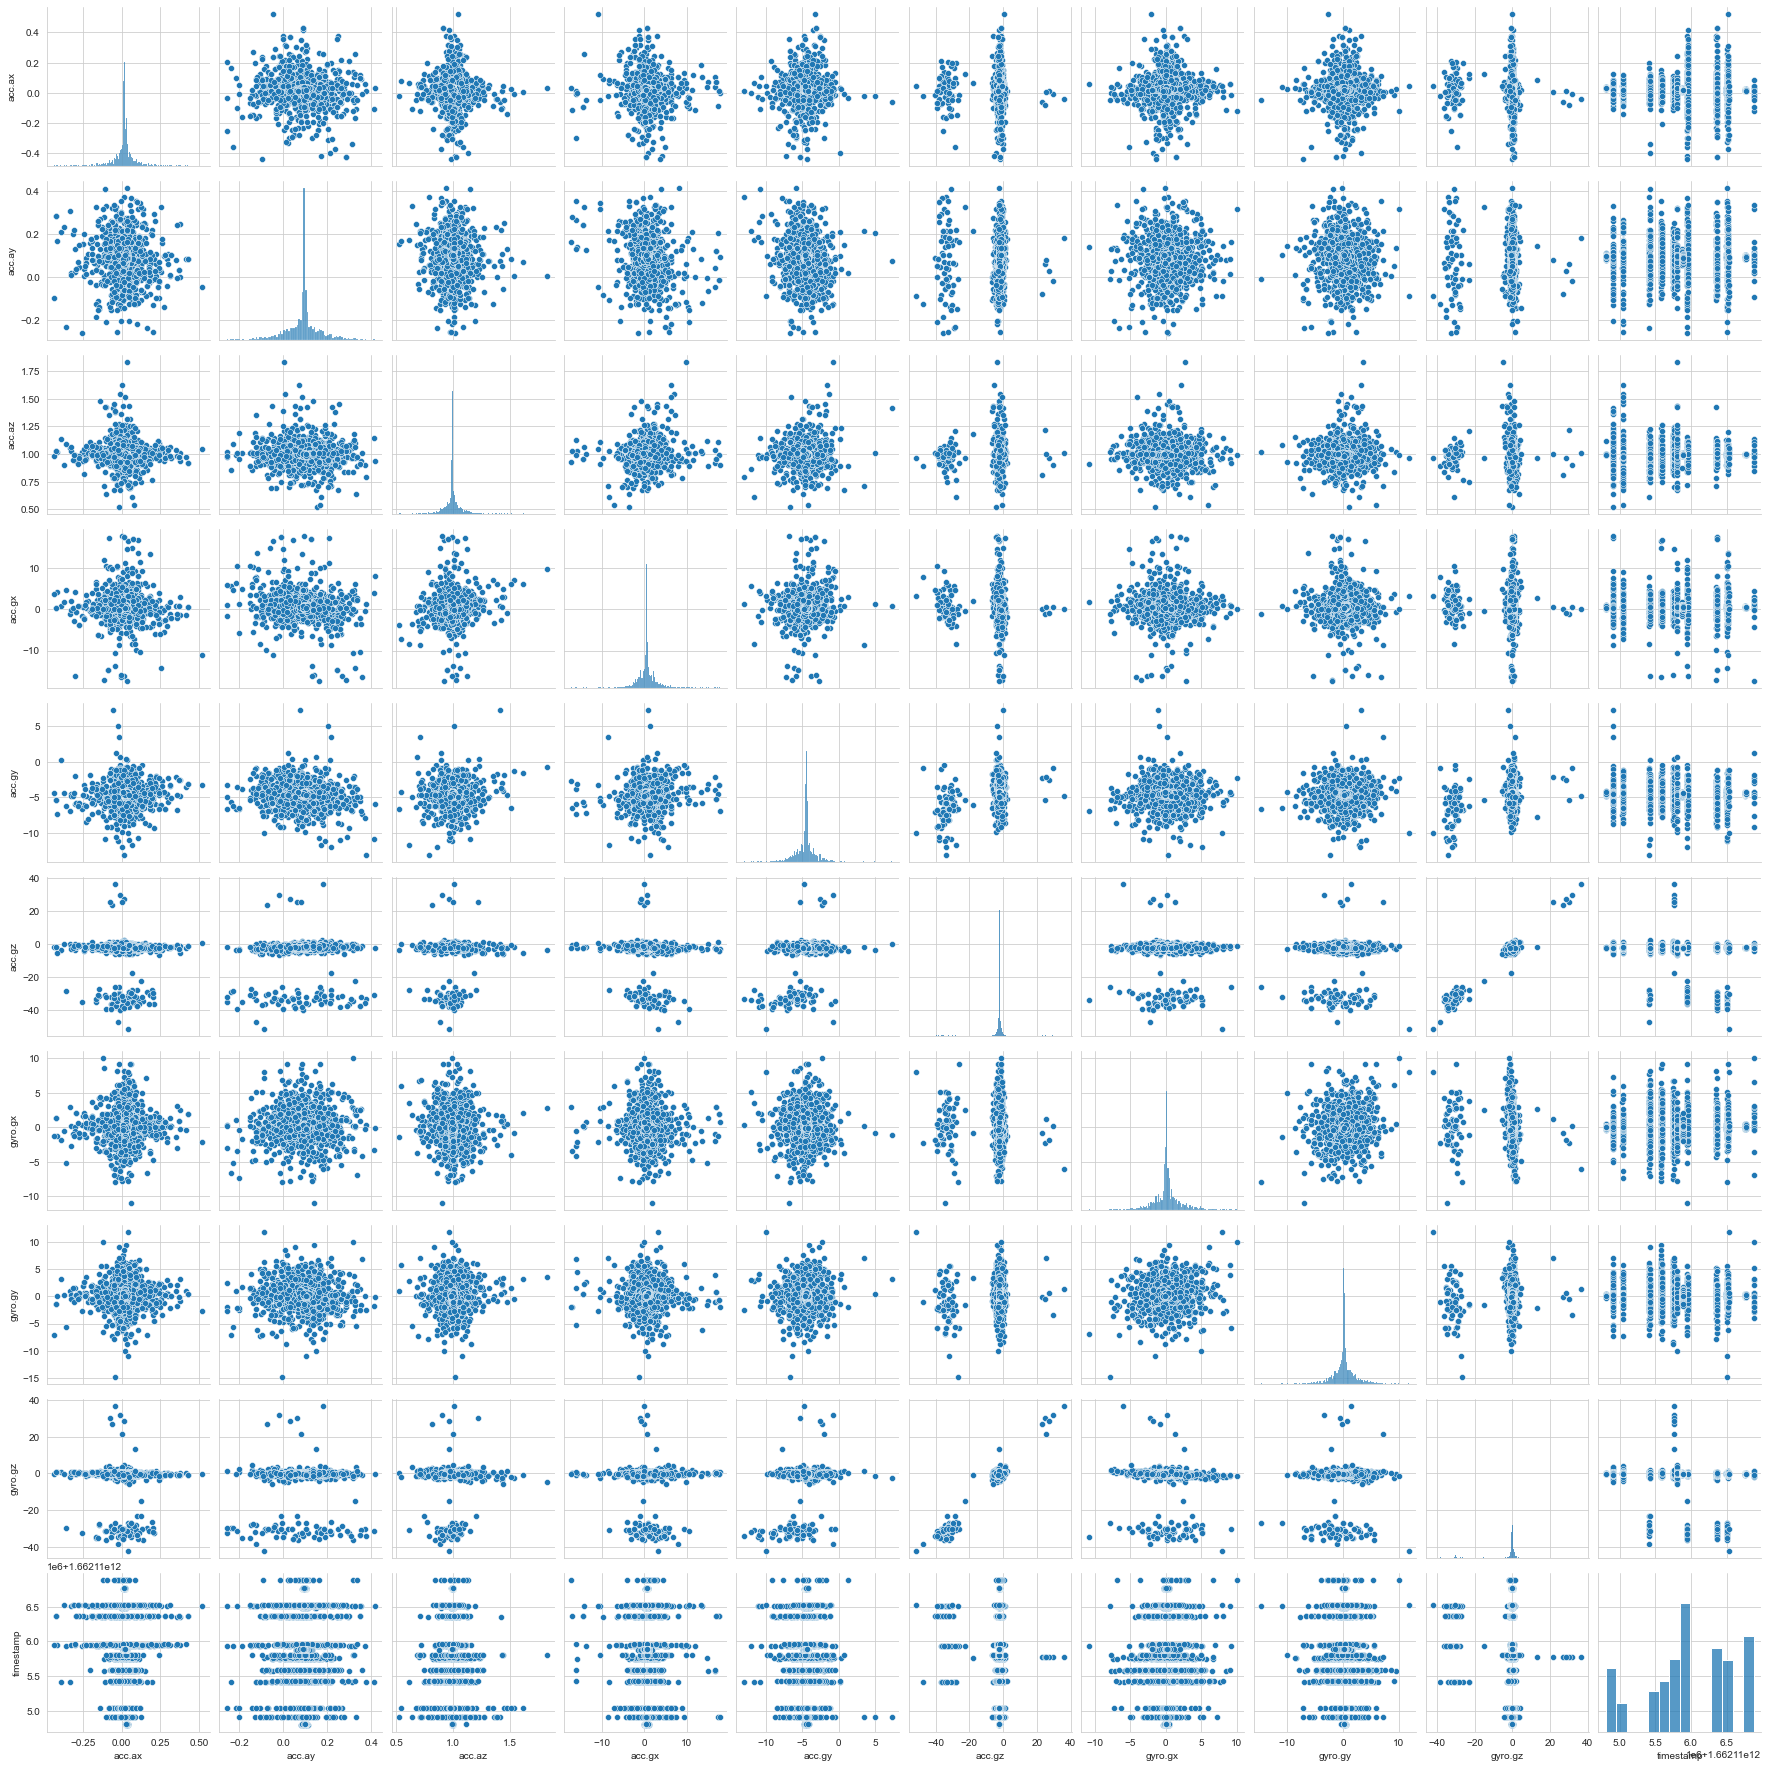

In [5]:
sns.pairplot(data)

In [6]:


accgx_list =[]
accgy_list =[]
accgz_list = []


accax_list = []
accay_list = []
accaz_list = []


gyrogx_list = []
gyrogy_list = []
gyrogz_list = []

train_labels = []

window_size = 18 #enspricht eine Sekunde an Daten
step_size = 6


for i in range(0, data.shape[0] - window_size, step_size):
    accax = data['acc.ax'].values[i: i + 18]
    accay = data['acc.ay'].values[i: i + 18]
    accaz = data['acc.az'].values[i: i + 18]
    accgx = data['acc.gx'].values[i: i + 18]
    accgy = data['acc.gy'].values[i: i + 18]
    accgz = data['acc.gz'].values[i: i + 18]
    gyrogx = data['gyro.gz'].values[i: i + 18]
    gyrogy = data['gyro.gz'].values[i: i + 18]
    gyrogz = data['gyro.gz'].values[i: i + 18]
    label = stats.mode(target[i: i + 18])[0][0]
    
    accax_list.append(accax)
    accay_list.append(accay)
    accaz_list.append(accaz)
    accgx_list.append(accgx)
    accgy_list.append(accgy)
    accgz_list.append(accgz)
    gyrogx_list.append(gyrogx)
    gyrogy_list.append(gyrogy)
    gyrogz_list.append(gyrogz)
    train_labels.append(label)
    
# neues DataFrame
X_data = pd.DataFrame()

# Mittelwert
X_data['accax_mean'] = pd.Series(accax_list).apply(lambda x: x.mean())
X_data['accay_mean'] = pd.Series(accay_list).apply(lambda x: x.mean())
X_data['accaz_mean'] = pd.Series(accaz_list).apply(lambda x: x.mean())
X_data['accgx_mean'] = pd.Series(accgx_list).apply(lambda x: x.mean())
X_data['accgy_mean'] = pd.Series(accgy_list).apply(lambda x: x.mean())
X_data['accgz_mean'] = pd.Series(accgz_list).apply(lambda x: x.mean())
X_data['gyrogx_mean'] = pd.Series(gyrogx_list).apply(lambda x: x.mean())
X_data['gyrogy_mean'] = pd.Series(gyrogy_list).apply(lambda x: x.mean())
X_data['gyrogz_mean'] = pd.Series(gyrogz_list).apply(lambda x: x.mean())

# Standardabweichung
X_data['accax_std'] = pd.Series(accax_list).apply(lambda x: x.std())
X_data['accay_std'] = pd.Series(accay_list).apply(lambda x: x.std())
X_data['accaz_std'] = pd.Series(accaz_list).apply(lambda x: x.std())
X_data['accgx_std'] = pd.Series(accgx_list).apply(lambda x: x.std())
X_data['accgy_std'] = pd.Series(accgy_list).apply(lambda x: x.std())
X_data['accgz_std'] = pd.Series(accgz_list).apply(lambda x: x.std())
X_data['gyrogx_std'] = pd.Series(gyrogx_list).apply(lambda x: x.std())
X_data['gyrogy_std'] = pd.Series(gyrogy_list).apply(lambda x: x.std())
X_data['gyrogz_std'] = pd.Series(gyrogz_list).apply(lambda x: x.std())

# durchschnittliche absolute Abweichung
X_data['accax_aad'] = pd.Series(accax_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accay_aad'] = pd.Series(accay_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accaz_aad'] = pd.Series(accaz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgx_aad'] = pd.Series(accgx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgy_aad'] = pd.Series(accgy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgz_aad'] = pd.Series(accgz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogx_aad'] = pd.Series(gyrogx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogy_aad'] = pd.Series(gyrogy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogz_aad'] = pd.Series(gyrogz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# Minimalwert
X_data['accax_min'] = pd.Series(accax_list).apply(lambda x: x.min())
X_data['accay_min'] = pd.Series(accay_list).apply(lambda x: x.min())
X_data['accaz_min'] = pd.Series(accaz_list).apply(lambda x: x.min())
X_data['accgx_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['accgy_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['accgz_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['gyrogx_min'] = pd.Series(gyrogx_list).apply(lambda x: x.min())
X_data['gyrogy_min'] = pd.Series(gyrogy_list).apply(lambda x: x.min())
X_data['gyrogz_min'] = pd.Series(gyrogz_list).apply(lambda x: x.min())

# Maximalwert
X_data['accax_max'] = pd.Series(accax_list).apply(lambda x: x.max())
X_data['accay_max'] = pd.Series(accay_list).apply(lambda x: x.max())
X_data['accaz_max'] = pd.Series(accaz_list).apply(lambda x: x.max())
X_data['accgx_max'] = pd.Series(accgx_list).apply(lambda x: x.max())
X_data['accgy_max'] = pd.Series(accgy_list).apply(lambda x: x.max())
X_data['accgz_max'] = pd.Series(accgz_list).apply(lambda x: x.max())
X_data['gyrogx_max'] = pd.Series(gyrogx_list).apply(lambda x: x.max())
X_data['gyrogy_max'] = pd.Series(gyrogy_list).apply(lambda x: x.max())
X_data['gyrogz_max'] = pd.Series(gyrogz_list).apply(lambda x: x.max())


# Median
X_data['accax_median'] = pd.Series(accax_list).apply(lambda x: np.median(x))
X_data['accay_median'] = pd.Series(accay_list).apply(lambda x: np.median(x))
X_data['accaz_median'] = pd.Series(accaz_list).apply(lambda x: np.median(x))
X_data['accgx_median'] = pd.Series(accgx_list).apply(lambda x: np.median(x))
X_data['accgy_median'] = pd.Series(accgy_list).apply(lambda x: np.median(x))
X_data['accgz_median'] = pd.Series(accgz_list).apply(lambda x: np.median(x))
X_data['gyrogx_median'] = pd.Series(gyrogx_list).apply(lambda x: np.median(x))
X_data['gyrogy_median'] = pd.Series(gyrogy_list).apply(lambda x: np.median(x))
X_data['gyrogz_median'] = pd.Series(gyrogz_list).apply(lambda x: np.median(x))

# Median absolute Abweichung
X_data['accax_mad'] = pd.Series(accax_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accay_mad'] = pd.Series(accay_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accaz_mad'] = pd.Series(accaz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgx_mad'] = pd.Series(accgx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgy_mad'] = pd.Series(accgy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgz_mad'] = pd.Series(accgz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogx_mad'] = pd.Series(gyrogx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogy_mad'] = pd.Series(gyrogy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogz_mad'] = pd.Series(gyrogz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartilbereich
X_data['accax_IQR'] = pd.Series(accax_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accay_IQR'] = pd.Series(accay_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accaz_IQR'] = pd.Series(accaz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgx_IQR'] = pd.Series(accgx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgy_IQR'] = pd.Series(accgy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgz_IQR'] = pd.Series(accgz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogx_IQR'] = pd.Series(gyrogx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogy_IQR'] = pd.Series(gyrogy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogz_IQR'] = pd.Series(gyrogz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# avg resultant
X_data['avg_result_acc'] = [i.mean() for i in ((pd.Series(accax_list)**2 + pd.Series(accay_list)**2 + pd.Series(accaz_list)**2)**0.5)]


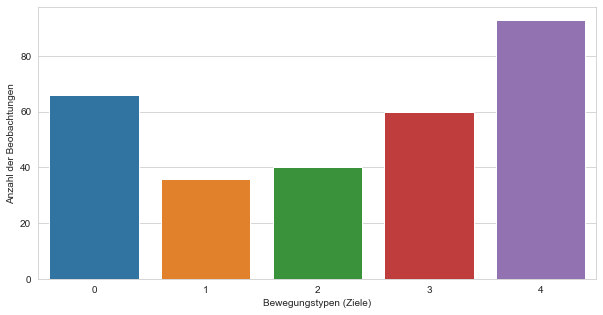

In [7]:
X_data['target.names'] = pd.DataFrame(train_labels)

sns.set_style('whitegrid') 
plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'target.names', data = X_data) 
plt.xlabel('Bewegungstypen (Ziele)')
plt.ylabel('Anzahl der Beobachtungen')
plt.show( )

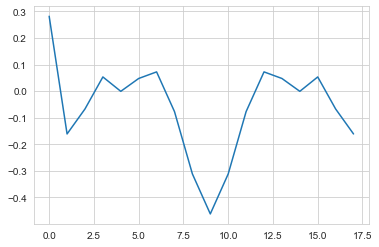

In [8]:
pd.Series(np.fft.fft(pd.Series(accax_list)[42])).plot()
plt.show()

In [9]:

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X = X_data
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=150)

logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

log = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.85      0.69      0.76        16
           2       0.67      0.73      0.70        11
           3       0.85      0.94      0.89        18
           4       1.00      0.96      0.98        23

    accuracy                           0.88        89
   macro avg       0.85      0.85      0.85        89
weighted avg       0.88      0.88      0.88        89



In [10]:

from sklearn.svm import SVC


svc = SVC(kernel="linear", C=1)

svc.fit(X_train,y_train)


y_pred = svc.predict(X_test)

svc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        11
           3       0.95      1.00      0.97        18
           4       1.00      0.96      0.98        23

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)

dtc.fit(X_train,y_train)


y_pred = dtc.predict(X_test)

dtc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        23

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [12]:

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred = knn.predict(X_test)


knn = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))
 

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       1.00      0.56      0.72        16
           2       0.54      0.64      0.58        11
           3       0.79      0.83      0.81        18
           4       1.00      0.96      0.98        23

    accuracy                           0.81        89
   macro avg       0.81      0.78      0.78        89
weighted avg       0.84      0.81      0.81        89



In [13]:
from sklearn.ensemble import RandomForestClassifier

reg_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)


rfc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       1.00      0.75      0.86        16
           2       0.67      0.36      0.47        11
           3       0.81      0.94      0.87        18
           4       0.88      0.91      0.89        23

    accuracy                           0.82        89
   macro avg       0.82      0.78      0.78        89
weighted avg       0.82      0.82      0.81        89



In [14]:
graph = pd.concat([rfc,dtc,svc,log,knn], axis = 1)
graph.columns = ['RandomForest', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier']
graph.rename(index={0:'Precision',1:'Recall', 2:'Accuracy', 3: 'F1'}, inplace=True)

print(graph)


           RandomForest  DecisionTreeClassifier       SVC  LogisticRegression  \
Precision      0.824448                     1.0  0.968838            0.879356   
Recall         0.820225                     1.0  0.966292            0.876404   
Accuracy       0.820225                     1.0  0.966292            0.876404   
F1             0.810281                     1.0  0.966081            0.875496   

           KNeighborsClassifier  
Precision              0.836851  
Recall                 0.808989  
Accuracy               0.808989  
F1                     0.808976  


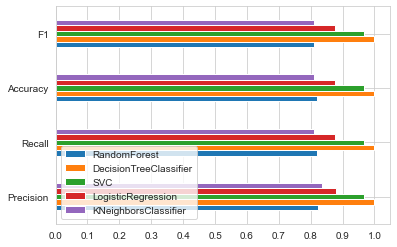

In [15]:
ax = graph.plot.barh(xticks = (np.arange(0, 1.1, step=0.1)), width=0.5)
ax.legend(loc='lower left')

In [16]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.express as px

fig = px.scatter_matrix(data_frame= data.drop('timestamp',axis=1), width=1200, height = 1600)
fig.show()

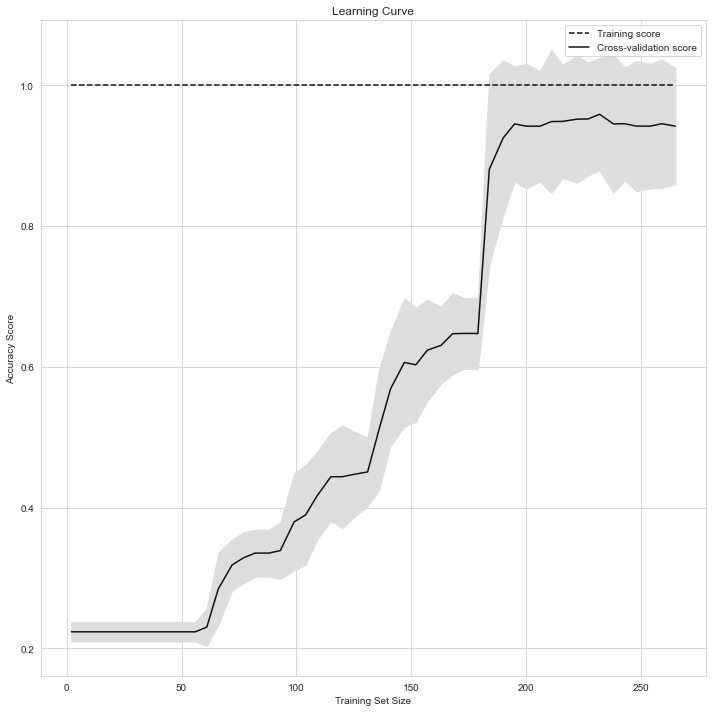

In [17]:
 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

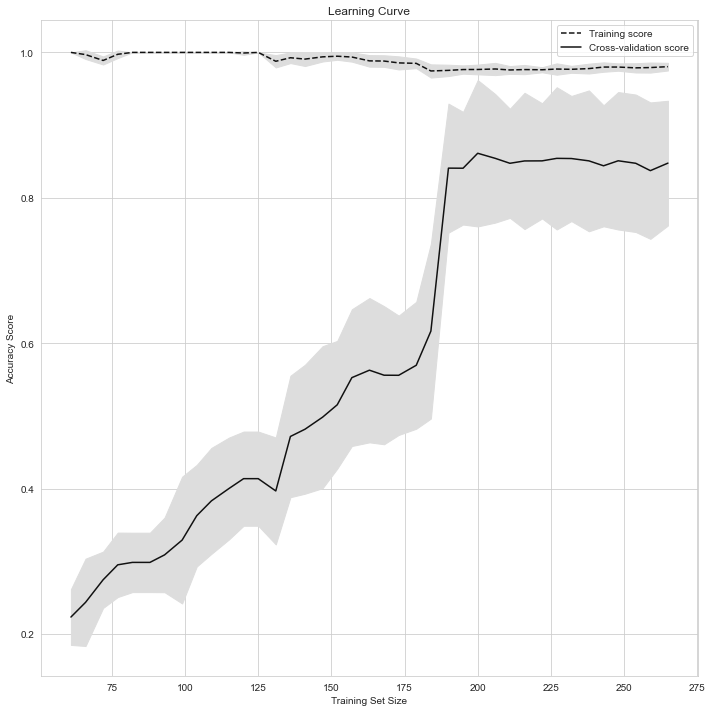

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

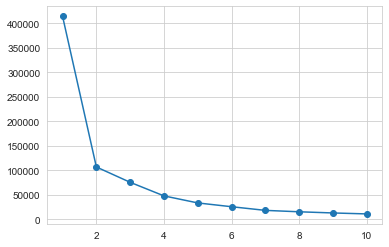

In [19]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_data.drop('target.names',axis=1))
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')

plt.show()

In [20]:
X = data.drop('timestamp', axis = 1)

kmeans = KMeans(
        n_clusters=5, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=X.columns)
clusters['label']=target_names
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=400,width=700)
fig4.show()

In [21]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label')

In [22]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=5)
#Run the clustering algorithm
model = k_means.fit(X_data.drop('target.names',axis=1))

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X_data.drop('target.names',axis=1))

k_means.cluster_centers_

array([[ 1.86490297e-02,  8.98838880e-02,  9.98059545e-01,
         5.30996607e-01, -4.46870441e+00, -2.19171544e+00,
        -2.01615220e-01, -2.01615220e-01, -2.01615220e-01,
         5.37413707e-02,  5.49116817e-02,  5.94580195e-02,
         1.93668574e+00,  9.41293053e-01,  7.68937981e-01,
         5.87469765e-01,  5.87469765e-01,  5.87469765e-01,
         4.13878935e-02,  4.38209030e-02,  4.58429688e-02,
         1.36819951e+00,  7.43755772e-01,  5.95532702e-01,
         4.60603262e-01,  4.60603262e-01,  4.60603262e-01,
        -9.46887634e-02, -1.49529160e-02,  8.86841282e-01,
        -3.63519084e+00, -3.63519084e+00, -3.63519084e+00,
        -1.35997350e+00, -1.35997350e+00, -1.35997350e+00,
         1.24812519e-01,  1.94659847e-01,  1.12349521e+00,
         4.74263359e+00, -2.61832061e+00, -6.59656489e-01,
         9.54264802e-01,  9.54264802e-01,  9.54264802e-01,
         1.89789160e-02,  8.97845496e-02,  9.95928840e-01,
         5.07900763e-01, -4.47251908e+00, -2.21167939e+0

In [23]:
k_means.inertia_

33340.70999893119

In [24]:
labels = k_means.labels_
metrics.silhouette_score(X_data.drop('target.names',axis=1), labels, metric = 'euclidean')

0.8661876704699101

In [25]:
from operator import length_hint

y= X_data['target.names']
labels = k_means.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print((correct_labels), length_hint(y))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(length_hint(y))))

66 295
Accuracy score: 0.22


In [26]:
metrics.calinski_harabasz_score(X_data.drop('target.names',axis=1), labels)

828.1659400429035

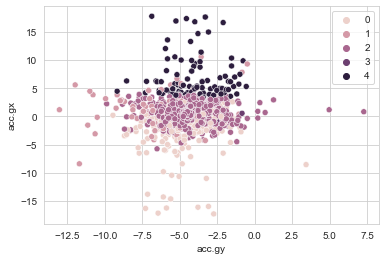

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=X, x= X['acc.gy'], y=X['acc.gx'], hue=kmeans.labels_)
plt.show()